<a href="https://colab.research.google.com/github/ignornce/Interpretibality-Of-DL/blob/main/collabs/DoncicDataProccess_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup tokens and env

In [ ]:
from google.colab import userdata
!pip install awscli


github_access_token =userdata.get('GITHUB_ACCESS_TOKEN')
aws_access_key_id =userdata.get('AWS_ACCESS_KEY_ID')
aws_secret_access_key = userdata.get('AWS_SECRET_ACCESS_KEY')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
import os

# Replace these with your actual AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = aws_access_key_id
os.environ['AWS_SECRET_ACCESS_KEY'] = aws_secret_access_key
os.environ['AWS_DEFAULT_REGION'] = 'eu-west-1'

!aws configure set aws_access_key_id $AWS_ACCESS_KEY_ID
!aws configure set aws_secret_access_key $AWS_SECRET_ACCESS_KEY
!aws configure set default.region $AWS_DEFAULT_REGION

# validate via printing s3 dirs
!aws s3 ls



2021-03-19 10:36:05 elasticbeanstalk-eu-central-1-395371565341
2024-05-28 19:59:53 nba-videos


# CSV Parsing


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
def load_csv_from_drive(csv_name):
  file_path = '/content/drive/My Drive/'+csv_name
  df = pd.read_csv(file_path)
  columns_to_keep = ['playDesc', 'videoUrl', 'on_ball_action_desc','on_ball_video-seconds','off_ball_action_desc','off_ball_video-seconds','videoPath_og']
  return df[columns_to_keep]
df=load_csv_from_drive("LukaDoncicPlays.csv")

In [ ]:
only_doncic_onball_df = df[df['playDesc'].str.contains(r'^(Luka Doncic makes|Luka Doncic misses).*jump shot$', case=False, na=False)]

# Print the filtered DataFrame
print(only_doncic_onball_df)
# for the frames on ball shooting actions do not include last second,

                                               playDesc  \
5      Luka Doncic misses a 25' 3PT step back jump shot   
30     Luka Doncic misses a 27' 3PT step back jump shot   
31    Luka Doncic makes a 9'  driving floating jump ...   
39        Luka Doncic misses a 29' 3PT pullup jump shot   
40      Luka Doncic makes a 29' 3PT step back jump shot   
...                                                 ...   
5436  Luka Doncic makes a 11'  driving floating jump...   
5441   Luka Doncic misses a 26' 3PT step back jump shot   
5446          Luka Doncic makes a 10'  pullup jump shot   
5448       Luka Doncic makes a 26' 3PT pullup jump shot   
5451          Luka Doncic misses a 8'  pullup jump shot   

                                               videoUrl on_ball_action_desc  \
5     https://videos.nba.com/nba/pbp/media/2023/11/0...                 NaN   
30    https://videos.nba.com/nba/pbp/media/2023/11/0...                 NaN   
31    https://videos.nba.com/nba/pbp/media/2023/11/0..

<ipython-input-169-a06e78eec8f7>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  only_doncic_onball_df = df[df['playDesc'].str.contains(r'^(Luka Doncic makes|Luka Doncic misses).*jump shot$', case=False, na=False)]


## MVP DATA PULLING PART
+ git clone mvp repo.
+ create subset of data
+ pull subset of data from s3.




In [ ]:
from getpass import getpass

# Input your personal access token
token = github_access_token

# Clone the repository
!git clone https://{token}@github.com/ignornce/mvp_bbal_analysis.git
%cd mvp_bbal_analysis/scripts
!pip install requests moviepy nba_api tqdm
!pip install -r requirements.txt

Cloning into 'mvp_bbal_analysis'...
remote: Enumerating objects: 478, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 478 (delta 149), reused 230 (delta 106), pack-reused 166
Receiving objects: 100% (478/478), 38.91 MiB | 27.16 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/mvp_bbal_analysis/scripts
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.6.2
    Uninstalling certifi-2024.6.2:
      Successfully uninstalled certifi-2024.6.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Us

### Pull data from S3

In [ ]:
import subprocess

DATA_PATH = "/content/data/"
PLAYER_NAME = "Luka_Doncic"
S3_URI_PREFIX = "s3://nba-videos/"
ABSOLUTE_S3_SCRIPT_PATH="/content/mvp_bbal_analysis/scripts/utils/s3_upload.py download"
SAMPLE_SIZE = 2
PLAYER_NAME = "Luka_Doncic/"
S3_URI_PREFIX = "s3://nba-videos/"
CLIPPED_VIDEOS = "/content/processed_/data"

def download_and_upload_to_s3_for_player():
 !python video_downloader.py  --video_path "./content/videos" --player_names "Luka Doncic" --limit 400

def clip_video_from_csv_label_interval(input_path, output_path, start_time, end_time):
    duration = end_time - start_time
    command = [
        'ffmpeg',
        '-i', input_path,
        '-ss', str(start_time),
        '-t', str(duration),
        '-c', 'copy',  # Use '-c' copy to copy the codec (faster and no re-encoding)
        output_path
    ]

    subprocess.run(command, check=True)
    print(f"Clipped video saved to {output_path}")


### YOLO OCR

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights
!pip install ultralytics
!pip install pytesseract opencv-python-headless
# Step 2: Clone YOLOv10 repository
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10

# Step 3: Install Tesseract OCR engine
!apt-get install tesseract-ocr

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt



0: 384x640 12 persons, 1822.9ms
Speed: 2.8ms preprocess, 1822.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Time: 0.00 sec - Game Clock: 8:56 ]


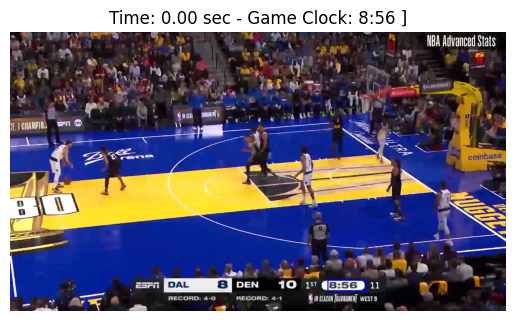


0: 384x640 11 persons, 1828.4ms
Speed: 3.9ms preprocess, 1828.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 0.50 sec - Game Clock: 8:55 ]


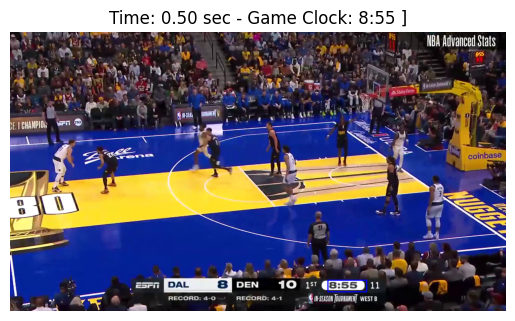


0: 384x640 13 persons, 1 chair, 1858.1ms
Speed: 4.4ms preprocess, 1858.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 1.00 sec - Game Clock: 8:55 ]


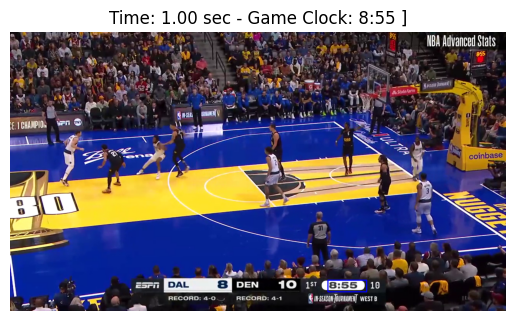


0: 384x640 12 persons, 1 chair, 1843.7ms
Speed: 4.3ms preprocess, 1843.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 1.50 sec - Game Clock: 8:54 ]


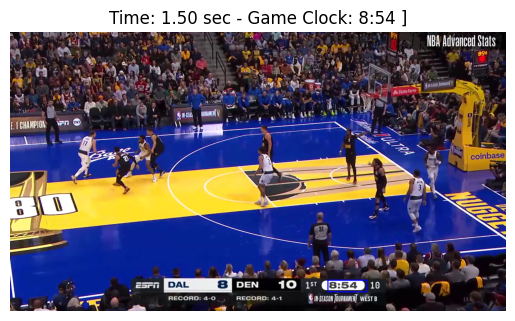


0: 384x640 11 persons, 1 chair, 2847.9ms
Speed: 2.9ms preprocess, 2847.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Time: 2.00 sec - Game Clock: 8:54 ]


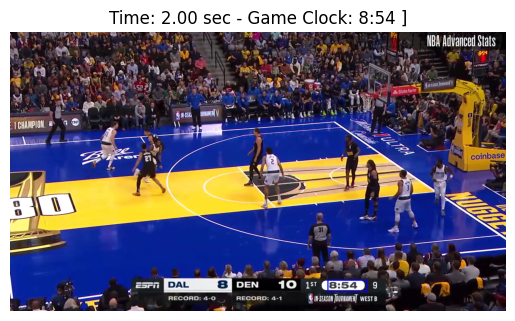


0: 384x640 10 persons, 1812.2ms
Speed: 3.0ms preprocess, 1812.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Time: 2.50 sec - Game Clock: 8:53 ]


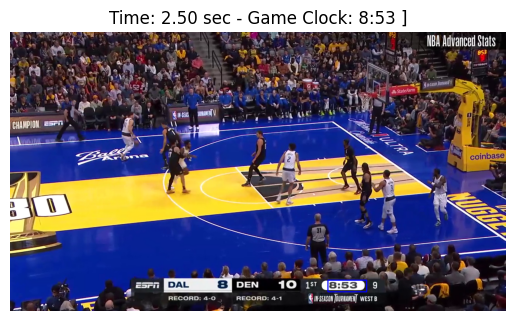


0: 384x640 11 persons, 1 chair, 1822.1ms
Speed: 6.1ms preprocess, 1822.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Time: 3.00 sec - Game Clock: 8:53 ]


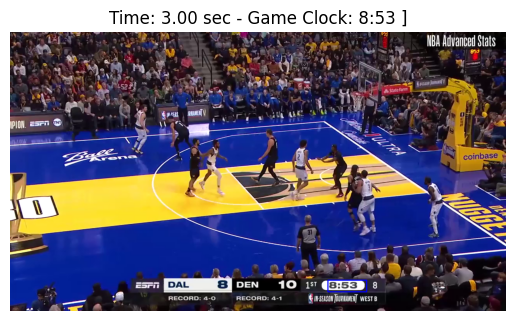


0: 384x640 11 persons, 1 chair, 1840.1ms
Speed: 2.9ms preprocess, 1840.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Time: 3.50 sec - Game Clock: 8:52 ]


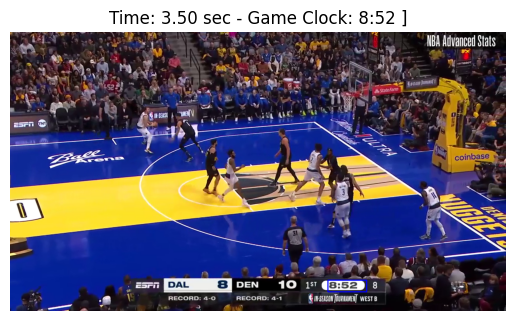


0: 384x640 9 persons, 1835.1ms
Speed: 4.7ms preprocess, 1835.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 4.00 sec - Game Clock: 8:52 ]


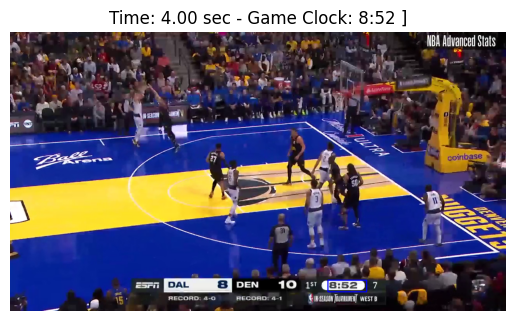


0: 384x640 8 persons, 2851.5ms
Speed: 2.5ms preprocess, 2851.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Time: 4.50 sec - Game Clock: 8:51 ]


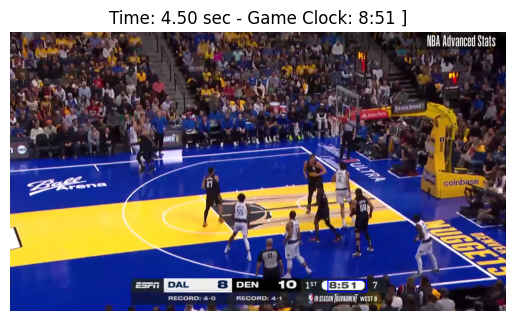


0: 384x640 11 persons, 1 chair, 1851.8ms
Speed: 2.7ms preprocess, 1851.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 5.00 sec - Game Clock: 8:51 ]


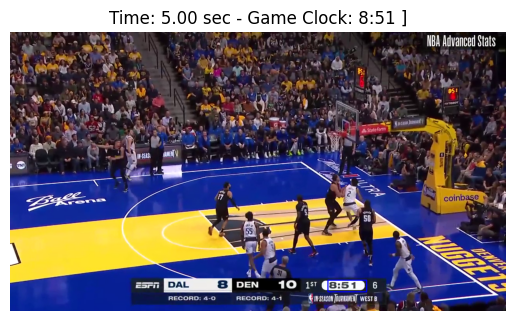


0: 384x640 13 persons, 1 chair, 1853.1ms
Speed: 2.9ms preprocess, 1853.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Time: 5.50 sec - Game Clock: 8:50 ]


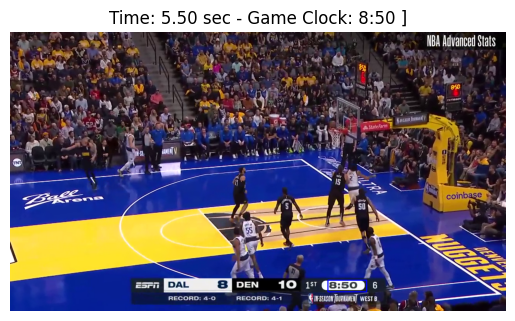


0: 384x640 11 persons, 1835.4ms
Speed: 9.8ms preprocess, 1835.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 6.00 sec - Game Clock: 8:50 ]


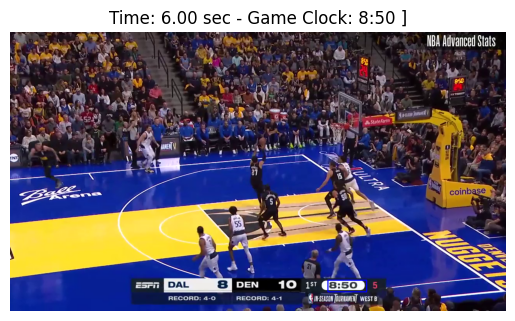


0: 384x640 11 persons, 1 chair, 2012.5ms
Speed: 4.0ms preprocess, 2012.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Time: 6.50 sec - Game Clock: 8:49 ]


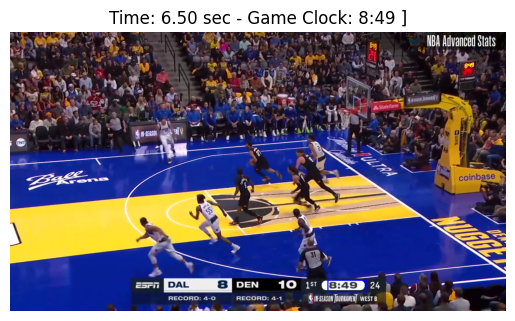


0: 384x640 9 persons, 2874.8ms
Speed: 4.5ms preprocess, 2874.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Time: 7.00 sec - Game Clock: 8:49 ]


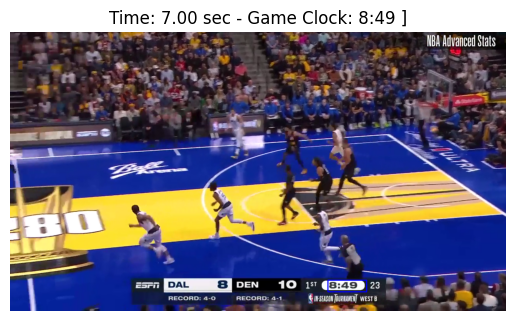


0: 384x640 12 persons, 1876.5ms
Speed: 3.8ms preprocess, 1876.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Time: 7.50 sec - Game Clock: 8:48 ]


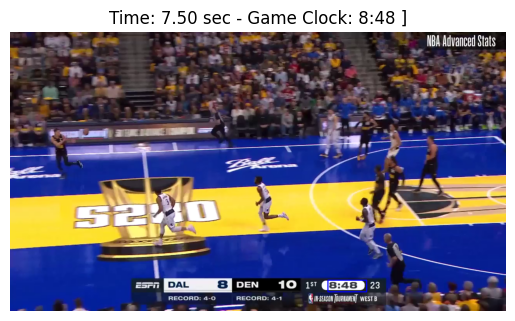


0: 384x640 10 persons, 1 tennis racket, 1853.4ms
Speed: 4.4ms preprocess, 1853.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Time: 8.00 sec - Game Clock: 8:48 ]


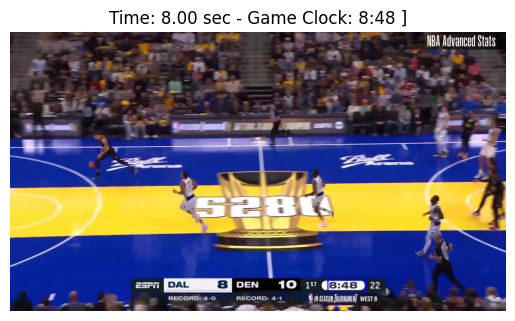


0: 384x640 6 persons, 1856.2ms
Speed: 6.6ms preprocess, 1856.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Time: 8.50 sec - Game Clock: 8:47 ]


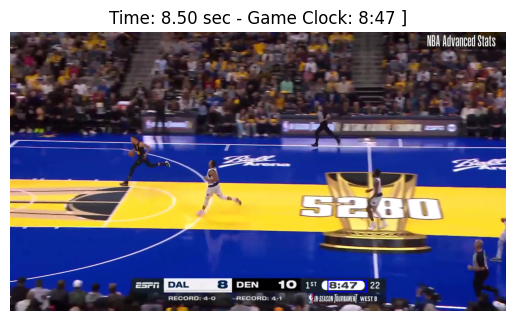

In [ ]:
import cv2
import pytesseract
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO("/content/data/yolov10/{HOME}/weights/yolov10x.pt")

# Video path
video_path = '/content/data/Luka_Doncic_22300006_30_1629029_24CPBv_og.mp4'  # Replace with your video path

# Open the video
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

# Interval in seconds
interval = 0.5

# Function to detect and read game clock
def process_frame(frame):
    results = model(frame)
    # Assuming results contain the game clock bounding box
    # Mock coordinates for demonstration purposes
    clock_bbox = [820, 640, 920, 670]  # Replace with actual detection results

    # Extract the game clock region
    x1, y1, x2, y2 = clock_bbox
    clock_region = frame[y1:y2, x1:x2]

    # Convert the extracted region to grayscale
    clock_region_gray = cv2.cvtColor(clock_region, cv2.COLOR_BGR2GRAY)

    # Apply OCR to read the game clock
    clock_text = pytesseract.image_to_string(clock_region_gray, config='--psm 7')

    return clock_text.strip()

# Iterate through the video and process frames
time = 0
while time < duration:
    # Set the video position
    cap.set(cv2.CAP_PROP_POS_MSEC, time * 1000)

    # Read the frame
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame to detect and read the game clock
    clock_text = process_frame(frame)
    print(f"Time: {time:.2f} sec - Game Clock: {clock_text}")

    # Draw the bounding box on the frame (optional)
    x1, y1, x2, y2 = [820, 640, 920, 670]   # Replace with actual detection results
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display the frame (optional)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Time: {time:.2f} sec - Game Clock: {clock_text}")
    plt.axis('off')
    plt.show()

    # Increment the time by the interval
    time += interval

# Release the video capture object
cap.release()

In [ ]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 2.7 MB/s eta 0:00:00


In [ ]:

def download_from_s3():
  for index, row in only_doncic_onball_df[:SAMPLE_SIZE].iterrows():
    print(row['videoPath_og'])
    og_path = row['videoPath_og']
    game_clock = row['game_clock']
    #!python /content/mvp_bbal_analysis/scripts/utils/s3_upload.py download "Luka_Doncic/Luka_Doncic_22300006_30_1629029_24CPBv_og.mp4" --local_dir "content/data" nba-videos
    !aws s3 cp $S3_URI_PREFIX$PLAYER_NAME$og_path $DATA_PATH

    clip_video_from_csv_label_interval(DATA_PATH + og_path,CLIPPED_VIDEOS + og_path,game_clock,)
download_from_s3()


Luka_Doncic_22300006_30_1629029_24CPBv_og.mp4
download: s3://nba-videos/Luka_Doncic/Luka_Doncic_22300006_30_1629029_24CPBv_og.mp4 to ./Luka_Doncic_22300006_30_1629029_24CPBv_og.mp4
Luka_Doncic_22300006_314_1629029_24TnJ2_og.mp4
download: s3://nba-videos/Luka_Doncic/Luka_Doncic_22300006_314_1629029_24TnJ2_og.mp4 to ./Luka_Doncic_22300006_314_1629029_24TnJ2_og.mp4


In [ ]:
! echo $DATA_PATH

/content/data/


In [ ]:
!ls

Luka_Doncic_22300006_12_1641726_243asQ_og.mp4


download: s3://nba-videos/Luka_Doncic/Luka_Doncic_22300006_12_1641726_243asQ_og.mp4 to ./Luka_Doncic_22300006_12_1641726_243asQ_og.mp4


### Bugs/Improvements
+ TEST s3 download cli after asking mavzu download from s3
does not work as expected

In [ ]:
!ls

Luka_Doncic_22300006_12_1641726_243asQ_og.mp4


In [ ]:
!echo $DATA_PATH

/content/data/


# JEPA PART

In [ ]:
!git clone https://github.com/facebookresearch/jepa.git


Cloning into 'jepa'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 179 (delta 79), reused 58 (delta 58), pack-reused 57
Receiving objects: 100% (179/179), 105.63 KiB | 1.12 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
!pip install speedtest-cli
import speedtest

def test_internet_speed():
    st = speedtest.Speedtest()
    st.download()
    st.upload()
    st.results.share()
    results = st.results.dict()
    return results

speed_results = test_internet_speed()

print(f"Download Speed: {speed_results['download'] / 1_000_000:.2f} Mbps")
print(f"Upload Speed: {speed_results['upload'] / 1_000_000:.2f} Mbps")
print(f"Ping: {speed_results['ping']} ms")

Download Speed: 3119.26 Mbps
Upload Speed: 876.42 Mbps
Ping: 8.412 ms
